# Schedule Database Builder
---

In [1]:
#jupyter nbconvert --to html Suns.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# Get list of team initials to create nested for loop for schedules
teams = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL',
         'MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
defunct = ['NJN','CHA','CHH','SFW','SDR','SDC','BUF','VAN','NOK','NOH','SEA','KCK','KCO','CIN','NOJ','WSB','CAP',
           'BAL']
associated = {'BRK':['NJN'],'CHO':['CHA','CHH'],'GSW':['SFW'],'HOU':['SDR'],'LAC':['SDC','BUF'],'MEM':['VAN'],
             'NOP':['NOK','NOH'],'OKC':['SEA'],'SAC':['KCK','KCO','CIN'],'UTA':['NOJ'],'WAS':['WSB','CAP','BAL']}

    # Not feasible to run every time, export to csv
    for t in teams:
        games = [None]*51
        for i in range(0,51):
            try:
                table = pd.read_html('https://www.basketball-reference.com/teams/' + t + '/' + str(i+1969) \
                                     + '_games.html')[0]
            except:
                # print("Failed: " + t + " " + str(i+1969))
                continue
            games[i] = table
            games[i].drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8', 'Notes'], inplace=True)
            games[i].rename(columns={'Unnamed: 7': 'Result'}, inplace=True)
            games[i].set_index(keys='G', inplace=True)
            if i < 2000:
                games[i].drop(columns=['Start (ET)'], inplace=True)
            games[i].dropna(inplace=True)
            if i >= 2000:
                games[i]['Date'] = pd.to_datetime(games[i]['Date'] + ' ' + games[i]['Start (ET)'])
                games[i].drop(columns=['Start (ET)'], inplace=True)
            else:
                games[i]['Date'] = pd.to_datetime(games[i]['Date'])
            games[i]['Record'] = games[i]['W'] +'-' + games[i]['L']
            games[i].drop(columns=['W','L'], inplace=True)
            games[i]['Margin'] = [int(x) - int(y) for x,y in zip(games[i]['Tm'],games[i]['Opp'])]
            # print("Checking: " + t + " " + str(i+1969))
            games[i].to_csv("Schedules/" + t + "_" + str(i + 1969) + '.csv')
    for t in defunct:
        games = [None]*51
        for i in range(0,51):
            try:
                table = pd.read_html('https://www.basketball-reference.com/teams/' + t + '/' + str(i+1969) \
                                     + '_games.html')[0]
            except:
                 print("Failed: " + t + " " + str(i+1969))
                continue
            games[i] = table
            games[i].drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8', 'Notes'], inplace=True)
            games[i].rename(columns={'Unnamed: 7': 'Result'}, inplace=True)
            games[i].set_index(keys='G', inplace=True)
            if i < 2000:
                games[i].drop(columns=['Start (ET)'], inplace=True)
            games[i].dropna(inplace=True)
            if i >= 2000:
                games[i]['Date'] = pd.to_datetime(games[i]['Date'] + ' ' + games[i]['Start (ET)'])
                games[i].drop(columns=['Start (ET)'], inplace=True)
            else:
                games[i]['Date'] = pd.to_datetime(games[i]['Date'])
            games[i]['Record'] = games[i]['W'] +'-' + games[i]['L']
            games[i].drop(columns=['W','L'], inplace=True)
            games[i]['Margin'] = [int(x) - int(y) for x,y in zip(games[i]['Tm'],games[i]['Opp'])]
             print("Checking: " + t + " " + str(i+1969))
            games[i].to_csv("Schedules/" + "DEFUNCT_"+ t + "_" + str(i + 1969) + '.csv')

In [2]:
schedules = {}
for t in teams:
    games = [None]*51
    for i in range(0,51):
        try:
            games[i] = pd.read_csv('Schedules/' + t + '_' + str(i+1969) + '.csv',index_col='G',
                                   parse_dates=['Date'],infer_datetime_format=True)
        except:
            continue
    schedules[t] = games
# Associate defunct team schedules with current team schedules
for d in defunct:
    games = [None]*51
    for i in range(0,51):
        try:
            games[i] = pd.read_csv('Schedules/' + 'DEFUNCT_' + d + '_' + str(i+1969) + '.csv',index_col='G',
                                  parse_dates=['Date'],infer_datetime_format=True)
            for a in associated:
                for x in associated[a]:
                    if x == d:
                        schedules[a][i] = games[i] 
        except:
            continue

In [92]:
summary = pd.DataFrame(columns=['Team','W','L','Win_Pct'])
for t in schedules:
    wins = [None]*51
    losses = [None]*51
    i = 0
    for s in schedules[t]:
        try:
            wins[i] = pd.get_dummies(s['Result'])['W'].sum()
            losses[i] = pd.get_dummies(s['Result'])['L'].sum()
            i += 1
        except:
            continue
    wins = [x for x in wins if x is not None]
    losses = [x for x in losses if x is not None]
    win_pct = sum(wins)/(sum(wins) + sum(losses))
    summary = summary.append({'Team': t,'W': sum(wins),'L': sum(losses),'Win_Pct': win_pct}, ignore_index=True)
summary.sort_values(by='Win_Pct',ascending=False,inplace=True)
summary['Rank'] = summary['Win_Pct'].rank(ascending=False).astype(int)
summary.set_index('Rank',inplace=True)
summary

,Team,W,L,Win_Pct
Rank,,,,
1,SAS,2162,1316,0.621622
2,LAL,2509,1625,0.606918
3,BOS,2380,1753,0.575853
4,OKC,2260,1874,0.546686
5,UTA,1964,1678,0.539264
6,POR,2134,1836,0.537531
7,HOU,2210,1924,0.534591
8,PHO,2186,1948,0.528786
9,MIA,1294,1200,0.518845


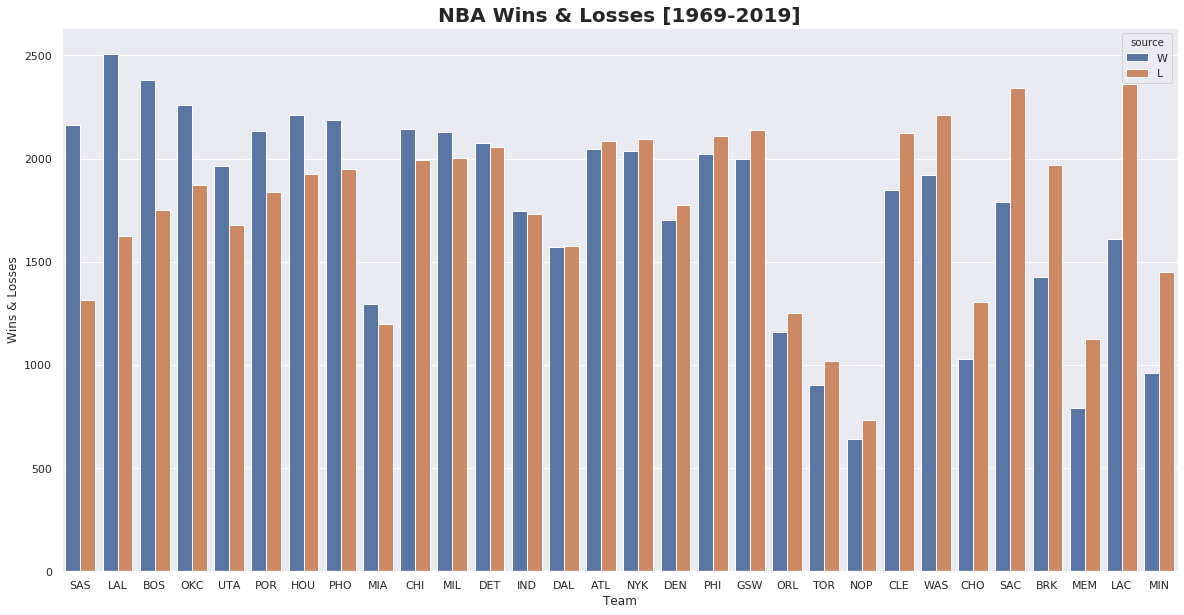

In [93]:
melted = pd.melt(summary, id_vars='Team', value_vars=['W','L'], var_name='source', value_name='W & L')
plt.figure(figsize=(20,10))
p = sns.barplot(x='Team',y='W & L', hue='source',data=melted)
plt.title('NBA Wins & Losses [1969-2019]', fontweight="bold", fontsize=20)
plt.xlabel('Team')
plt.ylabel('Wins & Losses')
plt.show()

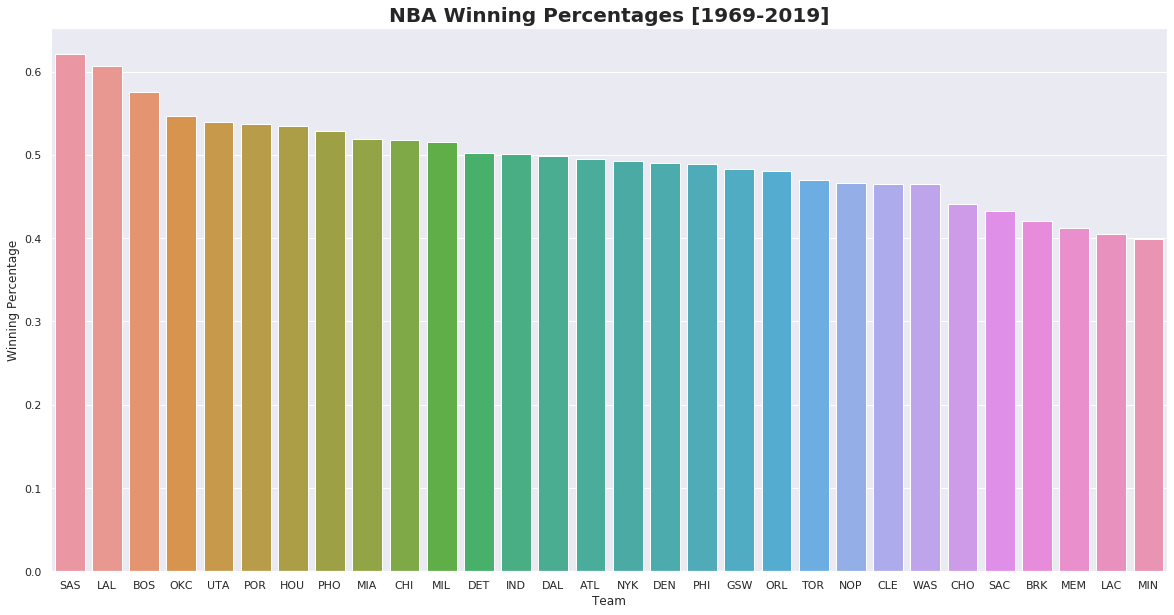

In [85]:
plt.figure(figsize=(20,10))
p = sns.barplot(x='Team',y='Win_Pct',data=summary)
plt.title('NBA Winning Percentages [1969-2019]', fontweight="bold", fontsize=20)
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.show()